# BigMart Sales Predictive Analysis

## Problem Statement

***The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store***.

## Hypothesis Generation

***By looking at the data we can make hypothesis which can be right or wrong.***

    1)The selling price of a product at each store is differnet from the other.
    
    2)Every item is divided into some categories based on amount of fat present in the itme.
    
    3)There is a correlation between the price of items at Big Mart and their sales volume, such 
    that as the price of an item increases, its sales volume will decrease.

## Loading Packages and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
mart_df = pd.read_csv("Train.csv")

In [3]:
mart_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
mart_df.shape

(8523, 12)

Our dataset contains 8523 rows and 12 columns and we have features like id of product its price and Outlets also have thier id and type of the outlet etc.. 

## Data Structure and Content

In [5]:
mart_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In the above table we have mean, std, count, minimum, maximum values of the numerical columns.

In [6]:
mart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In the above cell we have discovered that what data types are present in our data, by using info() we have two types of data one comes under float64 which are numerical values and other one is object which can be theoritical or categorical columns.

## Exploratory Data Analysis

***Checking Null Values***

In [7]:
mart_df.isnull().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [8]:
mart_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We handle missing values on the basis of whether it is numericl or categorical. We can fill median or mean values in missing places for numerical and for categorical we use mode to fill out missing places 

In [9]:
numerical_cols = mart_df.select_dtypes(exclude="object").columns.tolist()
print(numerical_cols)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [10]:
categorical_cols = mart_df.select_dtypes(include="object").columns.tolist()
print(categorical_cols)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


We have missing values only in two columns that are Item_Weight(Numerical) and Outlet_Size(categorical). 

## Checking For Outliers

In [11]:
column = mart_df["Item_Weight"]
Q1,Q3 = np.percentile(column, [25, 75])
IQR = Q3 - Q1
outliers = column[~((column > Q1 - 1.5 * IQR) & (column < Q3 + 1.5 * IQR))]
print(outliers)

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64


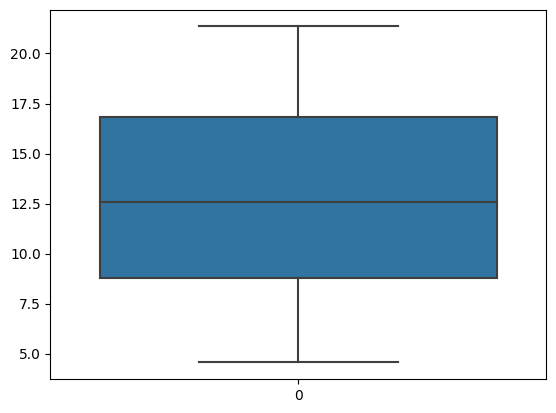

In [12]:
# mart_df.boxplot(column=["Item_Weight"])
sns.boxplot(mart_df["Item_Weight"])
plt.show()

We didn't find any outliers boxplot so we can use mean to fill the missing values in Item_Weight column.

## Handling the null values

In [13]:
# For Numerical column
replacing_values_1 = mart_df["Item_Weight"].mean()
mart_df["Item_Weight"].replace(np.nan, replacing_values_1, inplace=True)

In [14]:
from sklearn.impute import SimpleImputer

# create an imputer object with the mode strategy
imputer = SimpleImputer(strategy='most_frequent')

# fit and transform the imputer on the column
mart_df['Outlet_Size'] = imputer.fit_transform(mart_df[['Outlet_Size']])

In [15]:
mart_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Handling Duplicate values

In [16]:
duplicate = mart_df.duplicated()
print(duplicate.sum())

0


Since we don't have any duplicate record in out dataset so we will proceed further.

## Univariate Analysis

(array([ 923.,  573., 1053., 1248.,  804., 1098., 1200.,  480.,  557.,
         587.]),
 array([ 31.29   ,  54.84984,  78.40968, 101.96952, 125.52936, 149.0892 ,
        172.64904, 196.20888, 219.76872, 243.32856, 266.8884 ]),
 <BarContainer object of 10 artists>)

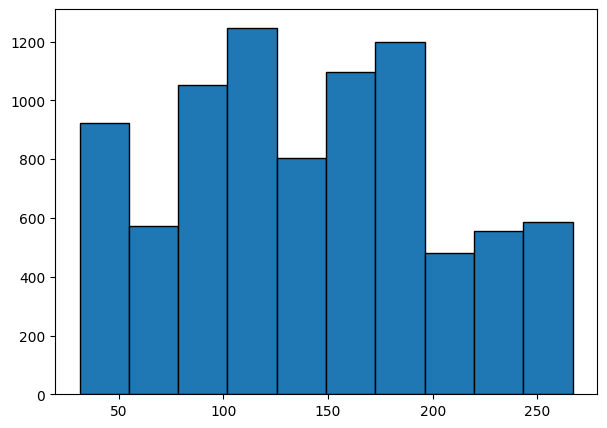

In [17]:
plt.figure(figsize=(7,5))
plt.hist(mart_df["Item_MRP"], edgecolor="black")

<AxesSubplot: xlabel='Item_Outlet_Sales', ylabel='Density'>

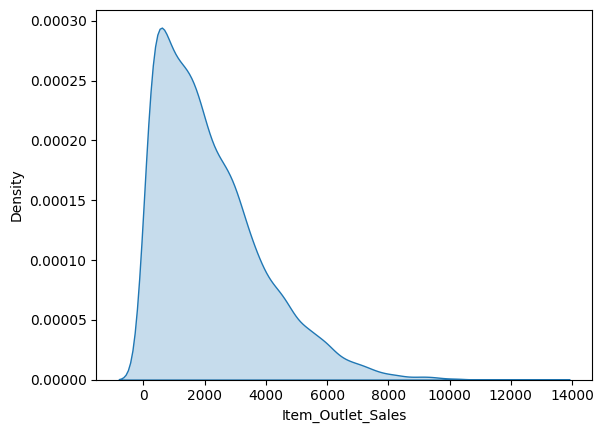

In [18]:
sns.kdeplot(mart_df["Item_Outlet_Sales"], fill=True)

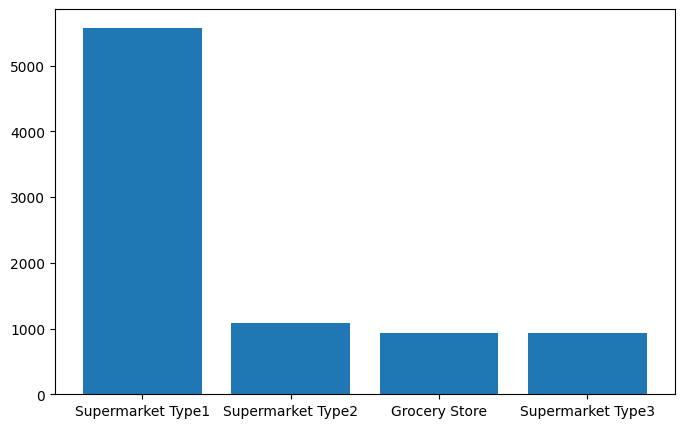

In [19]:
counts = mart_df["Outlet_Type"].value_counts()
values = mart_df["Outlet_Type"].unique()
plt.figure(figsize=(8,5))
plt.bar(values, counts)
plt.show()

## Bivariate Analysis

In this section we will find the dependent and independent variables in the dataset.

In [20]:
mart_df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


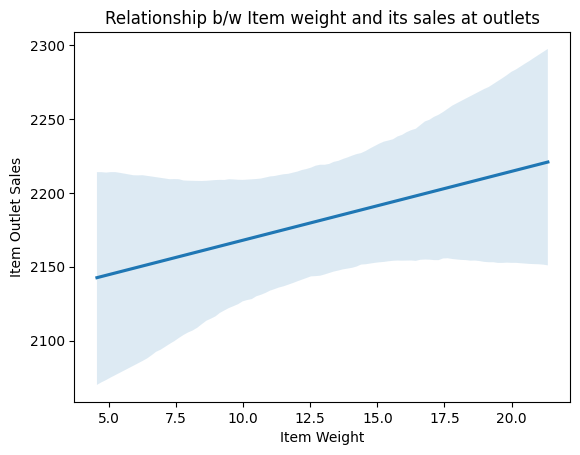

In [21]:
# Create the figure
sns.regplot(x=mart_df["Item_Weight"], y=mart_df["Item_Outlet_Sales"], scatter=False)

# Add labels and title
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet Sales')
plt.title('Relationship b/w Item weight and its sales at outlets')

# Show the plot
plt.show()

By looking at the above graph we can say that there is strong relationship b/w these two entities

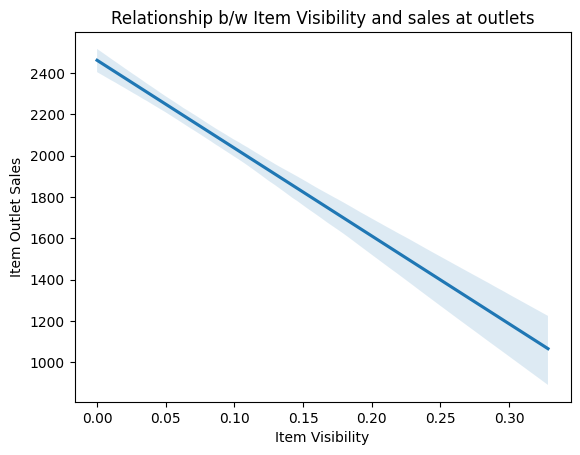

In [22]:

# Create the figure
sns.regplot(x=mart_df["Item_Visibility"], y=mart_df["Item_Outlet_Sales"], scatter=False)

# Add labels and title
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.title('Relationship b/w Item Visibility and sales at outlets')

# Show the plot
plt.show()

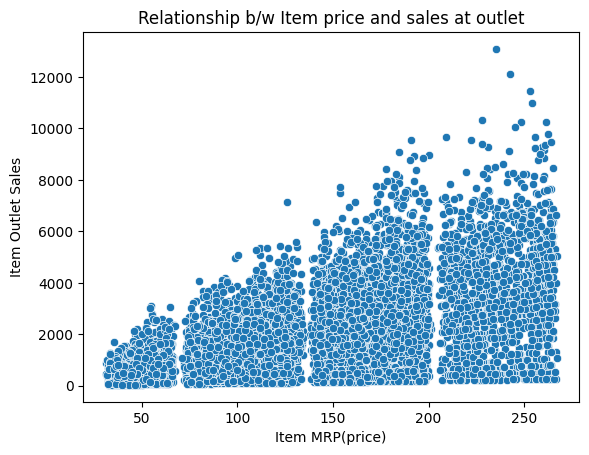

In [23]:
# Create the figure
sns.scatterplot(x=mart_df["Item_MRP"], y=mart_df["Item_Outlet_Sales"])

# Add labels and title
plt.xlabel('Item MRP(price)')
plt.ylabel('Item Outlet Sales')
plt.title('Relationship b/w Item price and sales at outlet')

# Show the plot
plt.show()

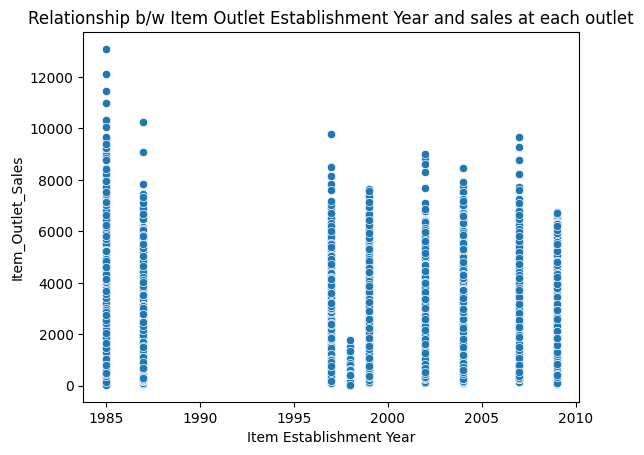

In [24]:
# Create the figure
sns.scatterplot(x=mart_df["Outlet_Establishment_Year"], y=mart_df["Item_Outlet_Sales"])

# Add labels and title
plt.xlabel('Item Establishment Year')
plt.ylabel('Item_Outlet_Sales')
plt.title('Relationship b/w Item Outlet Establishment Year and sales at each outlet')

# Show the plot
plt.show()

## Feature Engineering

In [25]:
# Sales at each store by outlet identifier
sales_at_each_outlet = mart_df.groupby(['Outlet_Identifier']).Item_Outlet_Sales.sum()

In [26]:
# sales of product by category at store
sales_item_type = mart_df.groupby(['Item_Type']).Item_Outlet_Sales.sum()

## Categorical Encoding 

### Label Encoding

In [27]:
# 'Item_Identifier', 'Item_Fat_Content', 'Item_Type', 
# 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
mart_df['Item_Identifier'] = encoder.fit_transform(mart_df["Item_Identifier"])
mart_df['Item_Fat_Content'] = encoder.fit_transform(mart_df["Item_Fat_Content"])
mart_df['Item_Type'] = encoder.fit_transform(mart_df["Item_Type"])
mart_df['Outlet_Identifier'] = encoder.fit_transform(mart_df["Outlet_Identifier"])
mart_df['Outlet_Size'] = encoder.fit_transform(mart_df["Outlet_Size"])
mart_df['Outlet_Location_Type'] = encoder.fit_transform(mart_df["Outlet_Location_Type"])
mart_df['Outlet_Type'] = encoder.fit_transform(mart_df["Outlet_Type"])

mart_df = mart_df.apply(encoder.fit_transform)

In [28]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(mart_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))
mart_df[encoded_cols] = encoder.transform(mart_df[categorical_cols])

In [29]:
mart_df.isnull().sum().sum()

0

In [30]:
mart_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,156,284,1,664,4,5592,9,4,1,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,8,57,2,880,14,473,3,8,1,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,662,376,1,715,10,2901,9,4,1,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1121,393,2,0,6,4227,0,3,1,2,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1297,265,1,0,9,627,1,1,0,2,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## Data Preprocessing 

Seprating the target column

In [31]:
x=mart_df
y=x.pop("Item_Outlet_Sales")

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1)

## Modeling

### Linear regression

In [35]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [39]:
from sklearn.metrics import mean_squared_error, r2_score
predictions = reg.predict(x_test)
print("Accuracy using mean aquared error:",  mean_squared_error(y_test, predictions))

Accuracy using mean aquared error: 9.305726250518887e+19


### Regularized Linear Regression

In [47]:
from sklearn.linear_model import Ridge
reg2 = Ridge(alpha=1.0)
reg2.fit(x_train, y_train)

predications = reg2.predict(x_test)
print("Mean Squared Error:", mean_squared_error(y_test, predications))

Mean Squared Error: 407341.32234476454


In [46]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

predications = lasso.predict(x_test)
print("Mean Squared Error:", mean_squared_error(y_test, predications))

Mean Squared Error: 345064.21705662395


In [51]:
from sklearn.linear_model import ElasticNet
reg_e = ElasticNet(alpha = 0.1, l1_ratio=0.5)
reg_e.fit(x_train, y_train)
predications = reg_e.predict(x_test)
print("Mean Squared Error:", mean_squared_error(y_test, predications))

Mean Squared Error: 319988.21621389757


### Random Forest

In [ ]:
from sklearn.ensemble import RansomForestRegressor
